<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Tensorflow-Developer-Certificate/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we're going to simplify it: preidcting a numerical variable based on some other combination of variables.

TLDR: predicting a number.

In [1]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.9.2


### Creating data to view and to fit


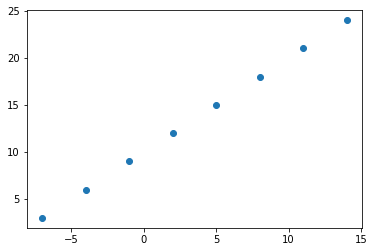

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor for the houing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [11]:
# Turn Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

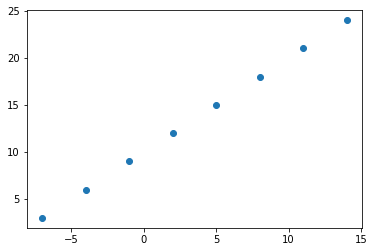

In [13]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creatin a model** - define the input and output layers, as well as the hidden layers of a deep learning model;
2. **Compilling a model** - define the loss function (the function which tells our model how wrong it is), the optimizes (tells our model how to improve the ppaterns in its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels)

In [ ]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# model=tf.keras.sequential()
# model.add(tf.keras.layers.Dense(1))

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.2014 - mae: 12.2014
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 12.0937 - mae: 12.0937
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.9789 - mae: 11.9789
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.8564 - mae: 11.8564
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 11.7257 - mae: 11.7257


In [23]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [25]:
# Making a prediction using the model
model.predict([17.0])

1/1 [==============================] - 0s 32ms/step


array([[9.001749]], dtype=float32)

In [26]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 51ms/step


array([[9.001749]], dtype=float32)

In [27]:
y_pred + 11

array([[20.001749]], dtype=float32)

## Improving our model